<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/multiclass_classification_fashon_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:

train_data[0].shape

print(len(train_data))


60000


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

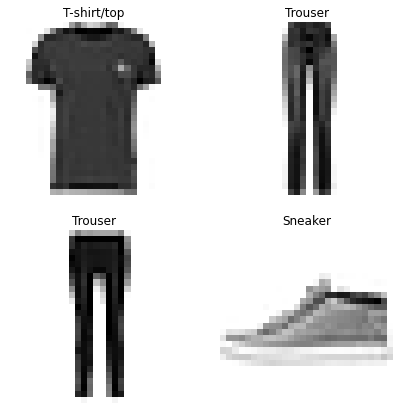

In [4]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

so if the labels or the datas are one hot encoded it's okay to use categorical crossentropy as our loss function

In [5]:
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history=model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))




Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accurac

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


we can normalize our data to improve the performance and the accuracy of our prediction(which is the first step in preprocessing a data).
So to normalize our data we should first get the min and max values of our data.

In [7]:
train_data.min(),train_data.max()

(0, 255)

In [8]:
train_data_norm=train_data/255.0

In [9]:
test_data_norm=test_data/255.0

In [10]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
#lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
              metrics=['accuracy'])
history_2=model_2.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0062 - accuracy: 0.6579 - val_loss: 0.7105 - val_accuracy: 0.7455
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6488 - accuracy: 0.7654 - val_loss: 0.6441 - val_accuracy: 0.7737
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5974 - accuracy: 0.7829 - val_loss: 0.6321 - val_accuracy: 0.7717
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5743 - accuracy: 0.7941 - val_loss: 0.5913 - val_accuracy: 0.7937
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5575 - accuracy: 0.8040 - val_loss: 0.6081 - val_accuracy: 0.7922
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5448 - accuracy: 0.8081 - val_loss: 0.5966 - val_accuracy: 0.7914
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5381 - accuracy: 0.8101 - val_loss: 0.5711 - val_accuracy:

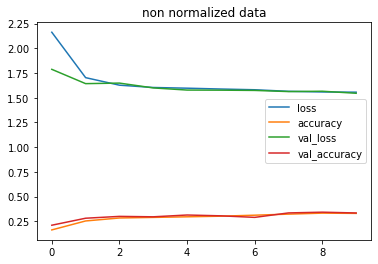

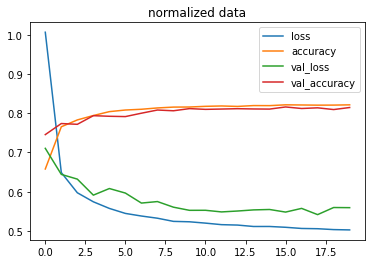

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(title="non normalized data")
pd.DataFrame(history_2.history).plot(title="normalized data")

In [12]:
#lrs=1e-3*10**(tf.range(40)/20)
#plt.semilogx(lrs,history_2.history['loss'])
#plt.xlabel('learning_rate')
#plt.ylabel('loss')


In [13]:
y_probs=model_2.predict(test_data_norm)
y_pred=y_probs.argmax(axis=1)
y_pred[:10]


313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

In [17]:
loss,accuracy=model_2.evaluate(test_data_norm,test_labels)  

313/313 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.8145
